# PAP2 V252: Aktivierung von Indium und Silber mit thermischen Neutronen

Untergrundbestimmung: 
('Mittelwert:', 5.204081632653061, 'Fehler:', 0.27071348467420692)
('A1=', 595.53454928341932, ', Standardfehler=', 26.847089522780674)
('l1=', 0.028511078531287665, ', Standardfehler=', 0.0023651073195640358)
('A2=', 112.70462152939713, ', Standardfehler=', 21.065119926188753)
('l2=', 0.004648856370429724, ', Standardfehler=', 0.00070106033990735767)
('chi2=', 38.669327943213617)
('chi2_red=', 1.0451169714382058)
('Wahrscheinlichkeit=', 39.0, '%')


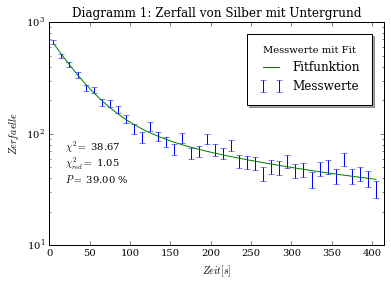

In [5]:
#A1: Zerfall der Silberisotope

#Untergrundbestimmung
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

unterg =np.loadtxt('Untergrund.dat', usecols=[1])

mittelw_unterg=np.mean(unterg)
fehler_unterg=np.std(unterg)/np.sqrt(len(unterg))
print('Untergrundbestimmung: ')
print('Mittelwert:', mittelw_unterg, 'Fehler:',fehler_unterg)

n1, n2, n3, n4 =np.loadtxt('silber.txt', usecols=[1,2,3,4], unpack=True)
N=n1+n2+n3+n4
Fehler_N=np.sqrt(N)

t=np.arange(5,415,10)

y0=4* (mittelw_unterg + fehler_unterg) #Untergrund 

def fit_func(x, A1, l1, A2, l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func, t, N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
plt.errorbar(t,N, Fehler_N, linestyle='None', label='Messwerte') 
plt.plot(t,fit_func(t,*popt), label='Fitfunktion') 
plt.xlabel('$Zeit [s]$') 
plt.ylabel('$Zerfaelle$')
plt.title('Diagramm 1: Zerfall von Silber mit Untergrund') 
plt.yscale('log')
plt.axis((0, 415, 10, 1000))
plt.rcParams["figure.figsize"][0] = 9
plt.rcParams["figure.figsize"][1] = 4
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='best', shadow='true')

print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0])) 
print("l1=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1])) 
print("A2=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2])) 
print("l2=",popt[3], ", Standardfehler=", np.sqrt(pcov[3][3]))

chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2) 
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad 
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

from scipy.stats import chi2 
prob=round(1-chi2.cdf(chi2_,dof),2)*100 
print("Wahrscheinlichkeit=", prob,"%")

plt.text(20, 70, '$\chi^{2}=$ %.2f' %(chi2_), fontsize=10)
plt.text(20, 50, '$\chi_{red}^{2}=$ %.2f ' %(chi2_red), fontsize=10)
plt.text(20, 36, '$P=$ %.2f ' %(prob) + '%', fontsize=10)

#plt.savefig('v252_1silber.pdf',format='pdf')

('Mittelwert:', 5.204081632653061, 'Fehler:', 0.27071348467420692)
('A1=', 1334.7026747583925, ', Standardfehler=', 16.416985531709592)
('l1=', 0.00022048257392632292, ', Standardfehler=', 7.553272627048613e-06)
('chi2=', 26.991870755674658)
('chi2_red=', 1.2269032161670299)
('Wahrscheinlichkeit=', 21.0, '%')


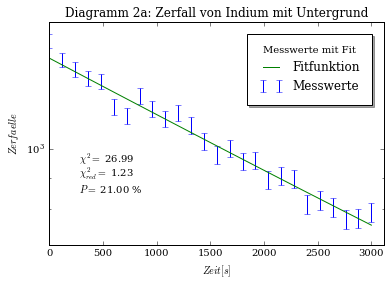

In [6]:
#A2: Zerfall Indium 

#Untergrundbestimmung
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

unterg =np.loadtxt('Untergrund.dat', usecols=[1])

mittelw_unterg=np.mean(unterg)
fehler_unterg=np.std(unterg)/np.sqrt(len(unterg))
print('Mittelwert:', mittelw_unterg, 'Fehler:',fehler_unterg)

n1=np.loadtxt('Messung_2.dat', usecols=[1])
N=n1
Fehler_N=np.sqrt(N)

t=np.arange(1,3121,120)

y0=(mittelw_unterg + fehler_unterg )*12 #Untergrund      

# Fit mit einer Exponentialfunktion
def fit_func2(x, A1, l1):
    return A1*np.exp(-x*l1) + y0

# Fit mit 2 Exponentialfunktionen
#def fit_func2(x, A1, l1, A2, l2):
#    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0


from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func2, t[1:], N[1:], p0=[1300,0.0002], sigma=Fehler_N[1:])

#Plotten 
plt.errorbar(t,N, Fehler_N, linestyle='None', label='Messwerte') 
plt.plot(t,fit_func2(t,*popt), label='Fitfunktion') 
plt.xlabel('$Zeit [s]$') 
plt.ylabel('$Zerfaelle$')
plt.title('Diagramm 2a: Zerfall von Indium mit Untergrund') 
plt.yscale('log')
plt.axis((0, 3120, 700, 1600))
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='best', shadow='true')

print("A1=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0])) 
print("l1=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1])) 

chi2_=np.sum((fit_func2(t,*popt)-N)**2/Fehler_N**2) 
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad 
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

from scipy.stats import chi2 
prob=round(1-chi2.cdf(chi2_,dof),2)*100 
print("Wahrscheinlichkeit=", prob,"%")

plt.text(280, 950, '$\chi^{2}=$ %.2f' %(chi2_), fontsize=10)
plt.text(280, 900, '$\chi_{red}^{2}=$ %.2f ' %(chi2_red), fontsize=10)
plt.text(280, 850, '$P=$ %.2f ' %(prob) + '%', fontsize=10)

#plt.savefig('v252_2cindium.pdf',format='pdf')